<a href="https://colab.research.google.com/github/AndrySone/Bottles_Without_Blunders/blob/main/SSRAugmentationCrossVal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import KFold

img_height, img_width = 128, 128
batch_size=16

In [ ]:
import zipfile

data_r = zipfile.ZipFile('/content/datafarm_side.zip', 'r')
data_r.printdir()

data_r.extractall()

os.getcwd()

data_root = 'train_set'
print(os.listdir(data_root))

File Name                                             Modified             Size
train_set/                                     2025-03-25 15:04:08            0
train_set/0/                                   2025-03-23 11:47:16            0
train_set/0/image_1.jpg                        2025-03-19 23:15:42       280648
train_set/0/image_10.jpg                       2025-03-19 23:25:34       356597
train_set/0/image_100.jpg                      2025-03-23 11:31:36       278341
train_set/0/image_101.jpg                      2025-03-23 11:31:54       298340
train_set/0/image_102.jpg                      2025-03-23 11:32:08       296686
train_set/0/image_103.jpg                      2025-03-23 11:32:24       299101
train_set/0/image_104.jpg                      2025-03-23 11:32:40       297467
train_set/0/image_105.jpg                      2025-03-23 11:33:20       275229
train_set/0/image_106.jpg                      2025-03-23 11:33:44       275892
train_set/0/image_107.jpg               

In [ ]:
#проверка датамиксера
n = [5,5,5,5,5,5,5,6,6,6,6,6,6,6]
m = [0,0,0,0,0,0,0,1,1,1,1,1,1,1]
print(*n,'\n',*m)
print(len(n))
#новая функция, для перемешивания датасета 21.03.25
def data_mixer(x, y, N):
  otv_x = []
  otv_y = []
  for i in range(int(N/2)):
    otv_x.append(x[i])
    otv_y.append(y[i])
    otv_x.append(x[int(N/2)+i])
    otv_y.append(y[int(N/2)+i])
    i=i+1
  return np.array(otv_x), np.array(otv_y)

n, m = data_mixer(n, m, len(n))
print(*n,'\n', *m)
print(len(n))
del n
del m

5 5 5 5 5 5 5 6 6 6 6 6 6 6 
 0 0 0 0 0 0 0 1 1 1 1 1 1 1
14
5 6 5 6 5 6 5 6 5 6 5 6 5 6 
 0 1 0 1 0 1 0 1 0 1 0 1 0 1
14


In [ ]:
from PIL import Image, ImageFilter
import cv2
def load_images_from_folder(folder):
  images = []
  labels = []
  for label in range(2):
    path = os.path.join(folder, str(label))
    for filename in os.listdir(path):
      img_path = os.path.join(path, filename)
      img = Image.open(img_path).convert('RGB')
      img = img.resize((img_height ,img_width))
      img = np.array(img)

      img_swap = np.fliplr(img)

      img = np.asarray(img)
      img = img.transpose(2, 0, 1)

      img_swap = np.asarray(img_swap)
      img_swap = img_swap.transpose(2, 0, 1)

      images.append(img)
      labels.append(label)
      images.append(img_swap)
      labels.append(label)
  return np.array(images, dtype=np.float32) / 255.0, np.array(labels)

In [ ]:
X_train, y_train = load_images_from_folder('/content/train_set')

In [ ]:
print("Количество фото: ",len(X_train), " тэгов", len(y_train))

Количество фото:  504  тэгов 504


In [ ]:
X_train, y_train = data_mixer(X_train, y_train, len(X_train))
print("Количество фото: ",len(X_train), " тэгов", len(y_train))

Количество фото:  504  тэгов 504


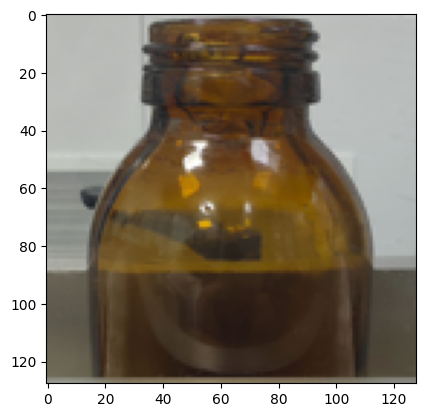

0


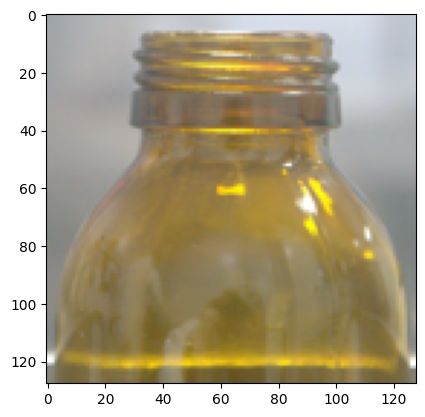

0


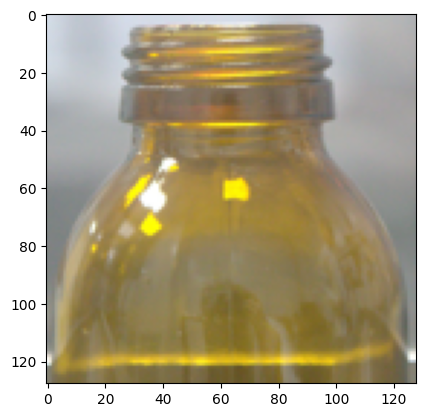

0


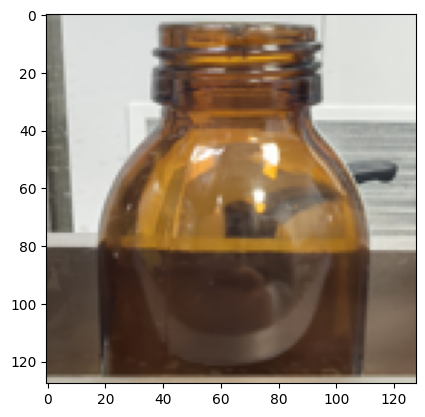

0


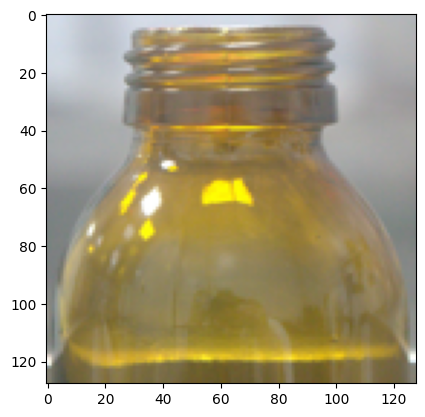

0


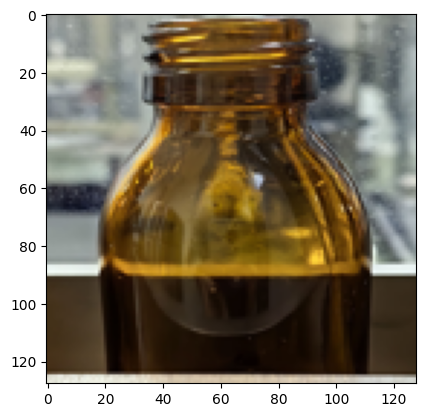

1


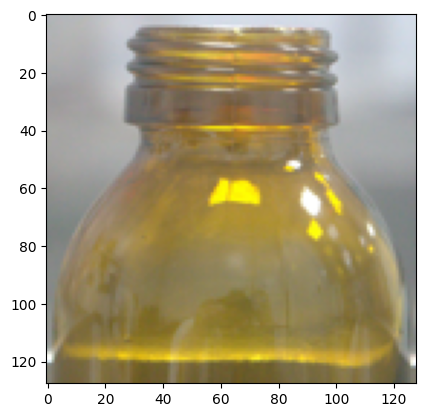

0


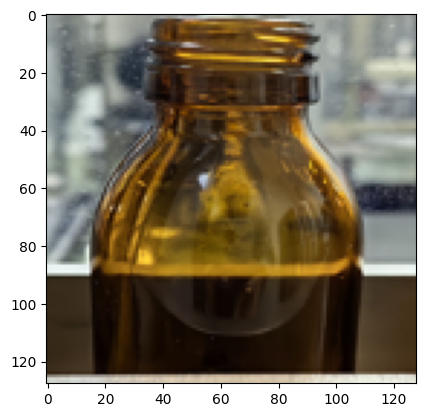

1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 

In [ ]:
import matplotlib.pyplot as plt
X_train_print = X_train[10].transpose(1, 2, 0)
plt.imshow(X_train_print)
plt.show()

print(y_train[10])
X_train_print = X_train[11].transpose(1, 2, 0)
plt.imshow(X_train_print)
plt.show()

print(y_train[11])
X_train_print = X_train[12].transpose(1, 2, 0)
plt.imshow(X_train_print)
plt.show()

print(y_train[12])
X_train_print = X_train[13].transpose(1, 2, 0)
plt.imshow(X_train_print)
plt.show()

print(y_train[13])

X_train_print = X_train[20].transpose(1, 2, 0)
plt.imshow(X_train_print)
plt.show()

print(y_train[20])
X_train_print = X_train[21].transpose(1, 2, 0)
plt.imshow(X_train_print)
plt.show()

print(y_train[21])
X_train_print = X_train[22].transpose(1, 2, 0)
plt.imshow(X_train_print)
plt.show()

print(y_train[22])
X_train_print = X_train[23].transpose(1, 2, 0)
plt.imshow(X_train_print)
plt.show()

print(y_train[23])


print(y_train)

In [ ]:
print(f'Количество train-изобр.: {X_train.shape[0]}, высота/ширина: {X_train.shape[1]}x{X_train.shape[2]}px')

print(len(X_train), " ", len(y_train))

Количество train-изобр.: 504, высота/ширина: 3x128px
504   504


In [ ]:
dataset = list(zip(X_train,y_train))
print(dataset[0])

(array([[[0.77254903, 0.7764706 , 0.77254903, ..., 0.8       ,
         0.79607844, 0.8       ],
        [0.7764706 , 0.7764706 , 0.7764706 , ..., 0.8       ,
         0.79607844, 0.8       ],
        [0.7764706 , 0.7764706 , 0.7764706 , ..., 0.79607844,
         0.79607844, 0.79607844],
        ...,
        [0.65882355, 0.65882355, 0.654902  , ..., 0.654902  ,
         0.67058825, 0.6784314 ],
        [0.6862745 , 0.68235296, 0.6862745 , ..., 0.6901961 ,
         0.69411767, 0.69803923],
        [0.6901961 , 0.6901961 , 0.6901961 , ..., 0.70980394,
         0.7176471 , 0.72156864]],

       [[0.77254903, 0.7764706 , 0.77254903, ..., 0.79607844,
         0.79607844, 0.8       ],
        [0.7764706 , 0.7764706 , 0.7764706 , ..., 0.79607844,
         0.79607844, 0.8       ],
        [0.7764706 , 0.7764706 , 0.7764706 , ..., 0.7921569 ,
         0.79607844, 0.79607844],
        ...,
        [0.63529414, 0.6313726 , 0.627451  , ..., 0.64705884,
         0.6627451 , 0.6745098 ],
        [0.

In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size=0.3)
print("Обучающие данные: " ,len(train_dataset))
print("тестовые данные: " ,len(test_dataset))

Обучающие данные:  352
тестовые данные:  152


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
#val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
model = models.resnet18(weights=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
class ModifiedClassifier(nn.Module):
    def __init__(self, num_ftrs, num_classes=2):
        super(ModifiedClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(num_ftrs, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

num_ftrs = model.fc.in_features
model.fc = ModifiedClassifier(num_ftrs)

# Перенос на устройство (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(device)

# Определим функцию потерь и оптимизатор (обучаем только параметры нового слоя)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

cuda


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import datetime
num_epochs = 10

for epoch in range(num_epochs):
    # Обучение
    start = datetime.datetime.now()
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (preds == labels).sum().item()

    train_loss /= len(train_dataset)
    train_acc = correct_train / total_train
    finish = datetime.datetime.now()
    print("Время обучения: ", finish - start)
    print(f"Эпоха {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")


Время обучения:  0:00:01.986807
Эпоха 1/10 | Train Loss: 0.6391, Train Acc: 0.6023
Время обучения:  0:00:00.461270
Эпоха 2/10 | Train Loss: 0.5833, Train Acc: 0.6733
Время обучения:  0:00:00.506051
Эпоха 3/10 | Train Loss: 0.4567, Train Acc: 0.7415
Время обучения:  0:00:00.487055
Эпоха 4/10 | Train Loss: 0.4299, Train Acc: 0.7528
Время обучения:  0:00:00.325219
Эпоха 5/10 | Train Loss: 0.4042, Train Acc: 0.7756
Время обучения:  0:00:00.350504
Эпоха 6/10 | Train Loss: 0.3298, Train Acc: 0.8551
Время обучения:  0:00:00.329233
Эпоха 7/10 | Train Loss: 0.3737, Train Acc: 0.8182
Время обучения:  0:00:00.336979
Эпоха 8/10 | Train Loss: 0.3627, Train Acc: 0.8381
Время обучения:  0:00:00.319580
Эпоха 9/10 | Train Loss: 0.2886, Train Acc: 0.8750
Время обучения:  0:00:00.338681
Эпоха 10/10 | Train Loss: 0.2884, Train Acc: 0.8722


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (preds == labels).sum().item()
        # Сохраняем истинные метки и предсказания для матрицы ошибок
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

test_loss /= len(test_dataset)
test_acc = correct_test / total_test

print(f"Ошибка на тестовых: {test_loss:.4f}, Точность на тестовых: {test_acc:.4f}")

Ошибка на тестовых: 0.2045, Точность на тестовых: 0.9079


Время предсказания:  0:00:00.095598
Predicted label: 0


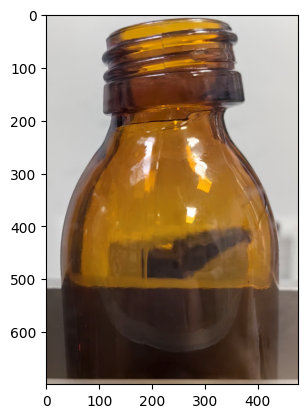

Время предсказания:  0:00:00.064256
Predicted label: 1


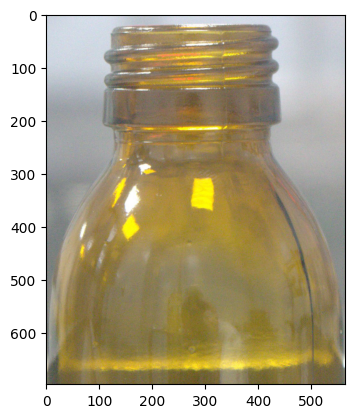

In [ ]:
from PIL import Image
from torchvision import transforms
import datetime

def predict_image(model, image_path, device):
    # Параметры, которые вы использовали для изменения размера
    img_width, img_height = 128, 128

    # Загрузка изображения
    img = Image.open(image_path).convert('RGB')
    img = img.resize((img_height ,img_width))
    img_np = np.array(img)


    # Преобразования, аналогичные обучению
    transform = transforms.Compose([
        transforms.ToTensor(),  # преобразует в тензор и нормализует в [0,1]
        # если нужно, добавьте нормализацию, например:
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    input_tensor = transform(img)
    input_tensor = input_tensor.unsqueeze(0)
    input_tensor = input_tensor.to(device)
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    return predicted.item()

# Использование:
image_path_b = '/content/bad_butilka.PNG'
start = datetime.datetime.now()
predicted_label = predict_image(model, image_path_b, device)
finish = datetime.datetime.now()
print("Время предсказания: ", finish - start)

print(f"Predicted label: {predicted_label}")
img_b = Image.open(image_path_b).convert('RGB')
plt.imshow(img_b)
plt.show()

image_path_g = '/content/good_butilka.PNG'
start = datetime.datetime.now()
predicted_label = predict_image(model, image_path_g, device)
finish = datetime.datetime.now()
print("Время предсказания: ", finish - start)
print(f"Predicted label: {predicted_label}")
img_g = Image.open(image_path_g).convert('RGB')
plt.imshow(img_g)
plt.show()

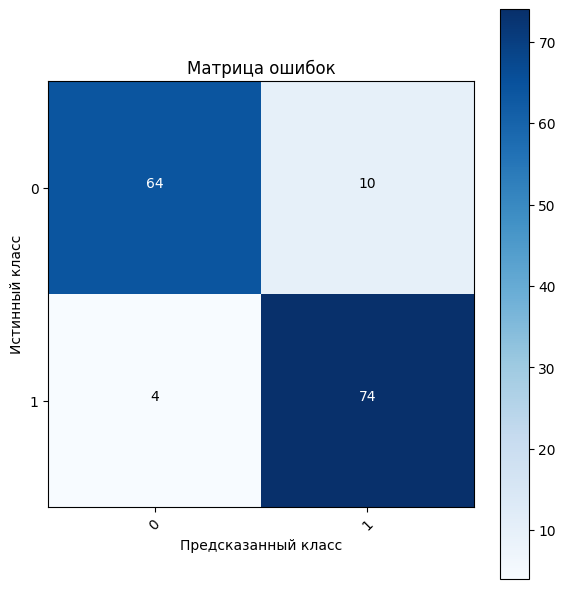

In [ ]:
class_names = ['0', '1']  # Замените на ваши классы

# Используйте class_names вместо test_dataset.classes
tick_marks = np.arange(len(class_names))
#plt.xticks(tick_marks, class_names, rotation=45)
#plt.yticks(tick_marks, class_names)
from sklearn.metrics import confusion_matrix
import itertools

# Предположим, что all_labels и all_preds уже определены
cm = confusion_matrix(all_labels, all_preds)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

# Замените test_dataset.classes на ваш список классов
class_names = ['0', '1']  # Замените на ваши классы
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

Кросвалидация

In [ ]:
from sklearn.model_selection import KFold
import torch

k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True)

dataset = list(zip(X_train, y_train))

results = {}

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f"Fold {fold+1}/{k_folds}")

    train_subset = [dataset[i] for i in train_idx]
    val_subset = [dataset[i] for i in val_idx]

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    model = models.resnet18(weights=True)
    for param in model.parameters():
        param.requires_grad = False

    num_ftrs = model.fc.in_features
    model.fc = ModifiedClassifier(num_ftrs)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (preds == labels).sum().item()

        train_loss /= len(train_subset)
        train_acc = correct_train / total_train

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        model.eval()
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (preds == labels).sum().item()

    val_loss /= len(val_subset)
    val_acc = correct_val / total_val

    print(f"Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}")

    results[fold] = {'train_loss': train_loss, 'train_acc': train_acc,
                     'val_loss': val_loss, 'val_acc': val_acc}

print("\nCross-Validation Results:")
for fold in range(k_folds):
    print(f"Fold {fold+1}: Train Acc: {results[fold]['train_acc']:.4f}, Val Acc: {results[fold]['val_acc']:.4f}")

Fold 1/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10 | Train Loss: 0.6441, Train Acc: 0.6278
Epoch 2/10 | Train Loss: 0.5406, Train Acc: 0.7171
Epoch 3/10 | Train Loss: 0.4426, Train Acc: 0.7742
Epoch 4/10 | Train Loss: 0.4610, Train Acc: 0.7494
Epoch 5/10 | Train Loss: 0.3823, Train Acc: 0.8114
Epoch 6/10 | Train Loss: 0.3477, Train Acc: 0.8437
Epoch 7/10 | Train Loss: 0.3312, Train Acc: 0.8238
Epoch 8/10 | Train Loss: 0.3959, Train Acc: 0.8213
Epoch 9/10 | Train Loss: 0.3016, Train Acc: 0.8561
Epoch 10/10 | Train Loss: 0.2762, Train Acc: 0.8883
Validation Loss: 0.2428, Validation Acc: 0.9208
Fold 2/5
Epoch 1/10 | Train Loss: 0.6772, Train Acc: 0.5955
Epoch 2/10 | Train Loss: 0.5382, Train Acc: 0.7097
Epoch 3/10 | Train Loss: 0.5163, Train Acc: 0.7345
Epoch 4/10 | Train Loss: 0.3859, Train Acc: 0.8189
Epoch 5/10 | Train Loss: 0.4071, Train Acc: 0.8139
Epoch 6/10 | Train Loss: 0.3717, Train Acc: 0.8337
Epoch 7/10 | Train Loss: 0.3182, Train Acc: 0.8561
Epoch 8/10 | Train Loss: 0.2785, Train Acc: 0.8685
Epoch 9/10 | Train Loss:

In [ ]:
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (preds == labels).sum().item()
        # Сохраняем истинные метки и предсказания для матрицы ошибок
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

test_loss /= len(test_dataset)
test_acc = correct_test / total_test

print(f"Ошибка на тестовых: {test_loss:.4f}, Точность на тестовых: {test_acc:.4f}")

Ошибка на тестовых: 0.2088, Точность на тестовых: 0.9145


In [ ]:
folds_bester = []
for i in range(2, 11):
  k_folds = i
  print(f"Количество фолдов {i}")
  kfold = KFold(n_splits=k_folds, shuffle=True)

  dataset = list(zip(X_train, y_train))

  results = {}

  for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
      print(f"Fold {fold+1}/{k_folds}")

      train_subset = [dataset[i] for i in train_idx]
      val_subset = [dataset[i] for i in val_idx]

      train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
      val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

      model = models.resnet18(weights=True)
      for param in model.parameters():
          param.requires_grad = False

      num_ftrs = model.fc.in_features
      model.fc = ModifiedClassifier(num_ftrs)
      model = model.to(device)

      criterion = nn.CrossEntropyLoss()
      optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

      for epoch in range(num_epochs):
          model.train()
          train_loss = 0.0
          correct_train = 0
          total_train = 0

          for inputs, labels in train_loader:
              inputs, labels = inputs.to(device), labels.to(device)

              optimizer.zero_grad()
              outputs = model(inputs)
              loss = criterion(outputs, labels)
              loss.backward()
              optimizer.step()

              train_loss += loss.item() * inputs.size(0)
              _, preds = torch.max(outputs, 1)
              total_train += labels.size(0)
              correct_train += (preds == labels).sum().item()

          train_loss /= len(train_subset)
          train_acc = correct_train / total_train

          print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

      val_loss = 0.0
      correct_val = 0
      total_val = 0

      with torch.no_grad():
          model.eval()
          for inputs, labels in val_loader:
              inputs, labels = inputs.to(device), labels.to(device)

              outputs = model(inputs)
              loss = criterion(outputs, labels)

              val_loss += loss.item() * inputs.size(0)
              _, preds = torch.max(outputs, 1)
              total_val += labels.size(0)
              correct_val += (preds == labels).sum().item()

      val_loss /= len(val_subset)
      val_acc = correct_val / total_val

      print(f"Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}")

      results[fold] = {'train_loss': train_loss, 'train_acc': train_acc,
                      'val_loss': val_loss, 'val_acc': val_acc}

  print("\nCross-Validation Results:")
  for fold in range(k_folds):
      print(f"Fold {fold+1}: Train Acc: {results[fold]['train_acc']:.4f}, Val Acc: {results[fold]['val_acc']:.4f}")
  model.eval()
  test_loss = 0.0
  correct_test = 0
  total_test = 0
  all_labels = []
  all_preds = []
  with torch.no_grad():
      for inputs, labels in test_loader:
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          test_loss += loss.item() * inputs.size(0)
          _, preds = torch.max(outputs, 1)
          total_test += labels.size(0)
          correct_test += (preds == labels).sum().item()
          # Сохраняем истинные метки и предсказания для матрицы ошибок
          all_labels.extend(labels.cpu().numpy())
          all_preds.extend(preds.cpu().numpy())

  test_loss /= len(test_dataset)
  test_acc = correct_test / total_test

  print(f"Ошибка на тестовых: {test_loss:.4f}, Точность на тестовых: {test_acc:.4f}")
  folds_bester.append(test_acc)

Количество фолдов 2
Fold 1/2
Epoch 1/10 | Train Loss: 0.6593, Train Acc: 0.5992
Epoch 2/10 | Train Loss: 0.6467, Train Acc: 0.6706
Epoch 3/10 | Train Loss: 0.5885, Train Acc: 0.6746
Epoch 4/10 | Train Loss: 0.4526, Train Acc: 0.7976
Epoch 5/10 | Train Loss: 0.4209, Train Acc: 0.7778
Epoch 6/10 | Train Loss: 0.4450, Train Acc: 0.7659
Epoch 7/10 | Train Loss: 0.3632, Train Acc: 0.8294
Epoch 8/10 | Train Loss: 0.3683, Train Acc: 0.8333
Epoch 9/10 | Train Loss: 0.3460, Train Acc: 0.8333
Epoch 10/10 | Train Loss: 0.2799, Train Acc: 0.8889
Validation Loss: 0.3140, Validation Acc: 0.8611
Fold 2/2
Epoch 1/10 | Train Loss: 0.7191, Train Acc: 0.5476
Epoch 2/10 | Train Loss: 0.6351, Train Acc: 0.6548
Epoch 3/10 | Train Loss: 0.5460, Train Acc: 0.6944
Epoch 4/10 | Train Loss: 0.4625, Train Acc: 0.7381
Epoch 5/10 | Train Loss: 0.4150, Train Acc: 0.7857
Epoch 6/10 | Train Loss: 0.4248, Train Acc: 0.8016
Epoch 7/10 | Train Loss: 0.3473, Train Acc: 0.8492
Epoch 8/10 | Train Loss: 0.2993, Train Acc: 0.

In [ ]:
print("самая высокая точность: ", max(folds_bester))
for i in range(len(folds_bester)):
  if(folds_bester[i]==max(folds_bester)):
    print("Количество флодов с самой лучшей точностью: ",i+2)

import matplotlib.pyplot as plt
max_folds = range(2, 11)
plt.figure(figsize=[13,8])
plt.plot(max_folds, folds_bester, label = 'точность флоуда')
plt.legend()
plt.title("Лучшее количество флоудов для кросвалидации")
plt.xlabel( "количество флоудов")
plt.ylabel("точность")
plt.show()

In [ ]:
class_names = ['0', '1']

tick_marks = np.arange(len(class_names))

from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

class_names = ['0', '1']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()